In [5]:
import pickle as p
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file = open("all_Data.pkl",'rb') 
data = p.load(file)


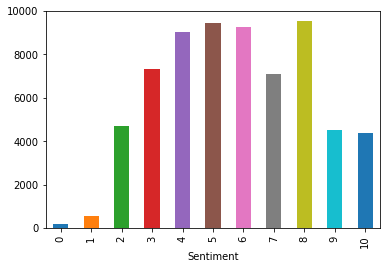

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


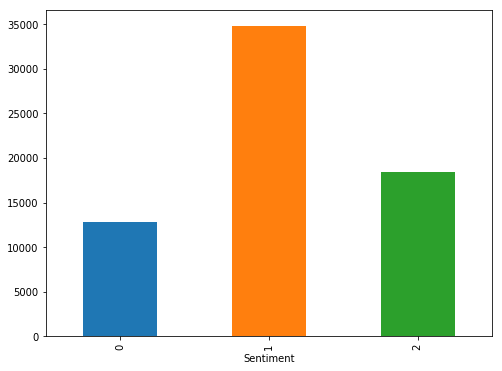

In [7]:
# fig = plt.figure(figsize=(8,6))
data.groupby('Sentiment').Title.count().plot.bar(ylim=0)
plt.show()

data.ix[ np.logical_and(data.Sentiment<=3, data.Sentiment>=0), ['Sentiment'] ] = 0
data.ix[ np.logical_and(data.Sentiment<=7, data.Sentiment>=4), ['Sentiment'] ] = 1
data.ix[ np.logical_and(data.Sentiment<=10, data.Sentiment>=8), ['Sentiment'] ] = 2

fig = plt.figure(figsize=(8,6))
data.groupby('Sentiment').Title.count().plot.bar(ylim=0)
plt.show()

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=1)
X_train = train['Title'].values
X_test = test['Title'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [9]:
print(data.head())

  Relevance  Sentiment                                              Title  \
0    medium          2  copper pauses its incline move after it posted...   
1    medium          1                   share or comment on this article   
2    medium          2  this canadian miner is poised to unlock furthe...   
3    medium          1  union at chile lomas bayas mine far from deal ...   
5    medium          2  the bullish outlook for metals makes now the t...   

                                               Texts sentiment  
0  in addition, the red metal is still trading co...  Positive  
1  the brent crude oil price rose to $66.38, whic...   Neutral  
2  i consent to receiving information from the mo...  Positive  
3  union president pedro valdivia said workers ag...   Neutral  
5  i consent to receiving information from the mo...  Positive  


In [10]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 2)
#Using training data to transform text into counts of features for each message
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)

In [11]:
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')



Support Vector Machine
Accuracy Score: 73.13398940196821%
Confusion Matrix: 
[[1793  741   97]
 [ 507 5504  855]
 [  61 1288 2364]]


In [12]:
test = ["Bitcoin can lose money and cause damage. "]
test_dtm = vect.transform(test)
predLabel = SVM.predict(test_dtm)
tags = ['Negative','Neutral','Positive']
#Display Output
print('The review is predicted',predLabel[0])

The review is predicted Negative


In [13]:
file = open('vector.pkl', 'wb')
p.dump(vect, file)
file.close()

file = open('svm.pkl', 'wb')
p.dump(SVM, file)
file.close()

In [ ]:
file = open('vector.pkl', 'rb')
vect = p.load(file)
file.close()

file = open('svm.pkl', 'rb')
SVM = p.load(file)
file.close()